In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('Housing.csv')
df.head()

df['Price']=df['price']

In [50]:
df.drop('price',axis=1,inplace=True)

In [51]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [52]:
df.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
Price               0
dtype: int64

In [53]:
# Data PreProcessing

df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [54]:
df.iloc[0:,4:8]

,mainroad,guestroom,basement,hotwaterheating
0,yes,no,no,no
1,yes,no,no,no
2,yes,no,yes,no
3,yes,no,yes,no
4,yes,yes,yes,no
...,...,...,...,...
540,yes,no,yes,no
541,no,no,no,no
542,yes,no,no,no
543,no,no,no,no


In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encode = encoder.fit_transform(df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]).toarray()

In [56]:
dff= pd.DataFrame(encode,columns=encoder.get_feature_names_out())
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [60]:
df= pd.concat([df.reset_index(drop=True),dff.reset_index(drop=True)],axis=1)
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,yes,no,no,no,yes,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,yes,no,no,no,yes,3,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,yes,no,yes,no,no,2,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,yes,no,yes,no,yes,3,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,yes,yes,yes,no,yes,2,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [61]:
df['price']=df['Price']

In [62]:
df.drop('Price',axis=1,inplace=True)

In [64]:
df.drop(columns=['mainroad','basement','guestroom','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1,inplace=True)
df.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13300000
1,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,12250000
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12250000
3,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,12215000
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,11410000


<Axes: >

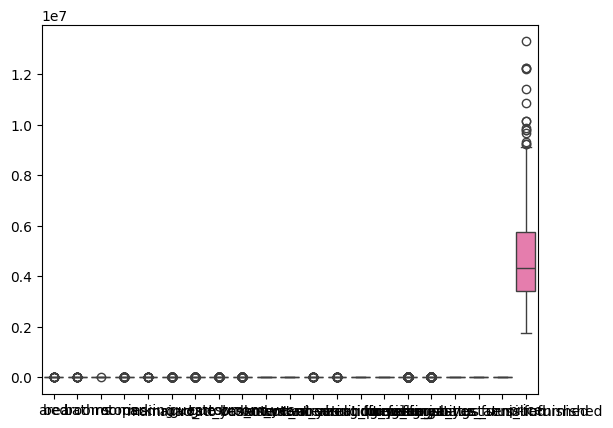

In [81]:
sns.boxplot(df)

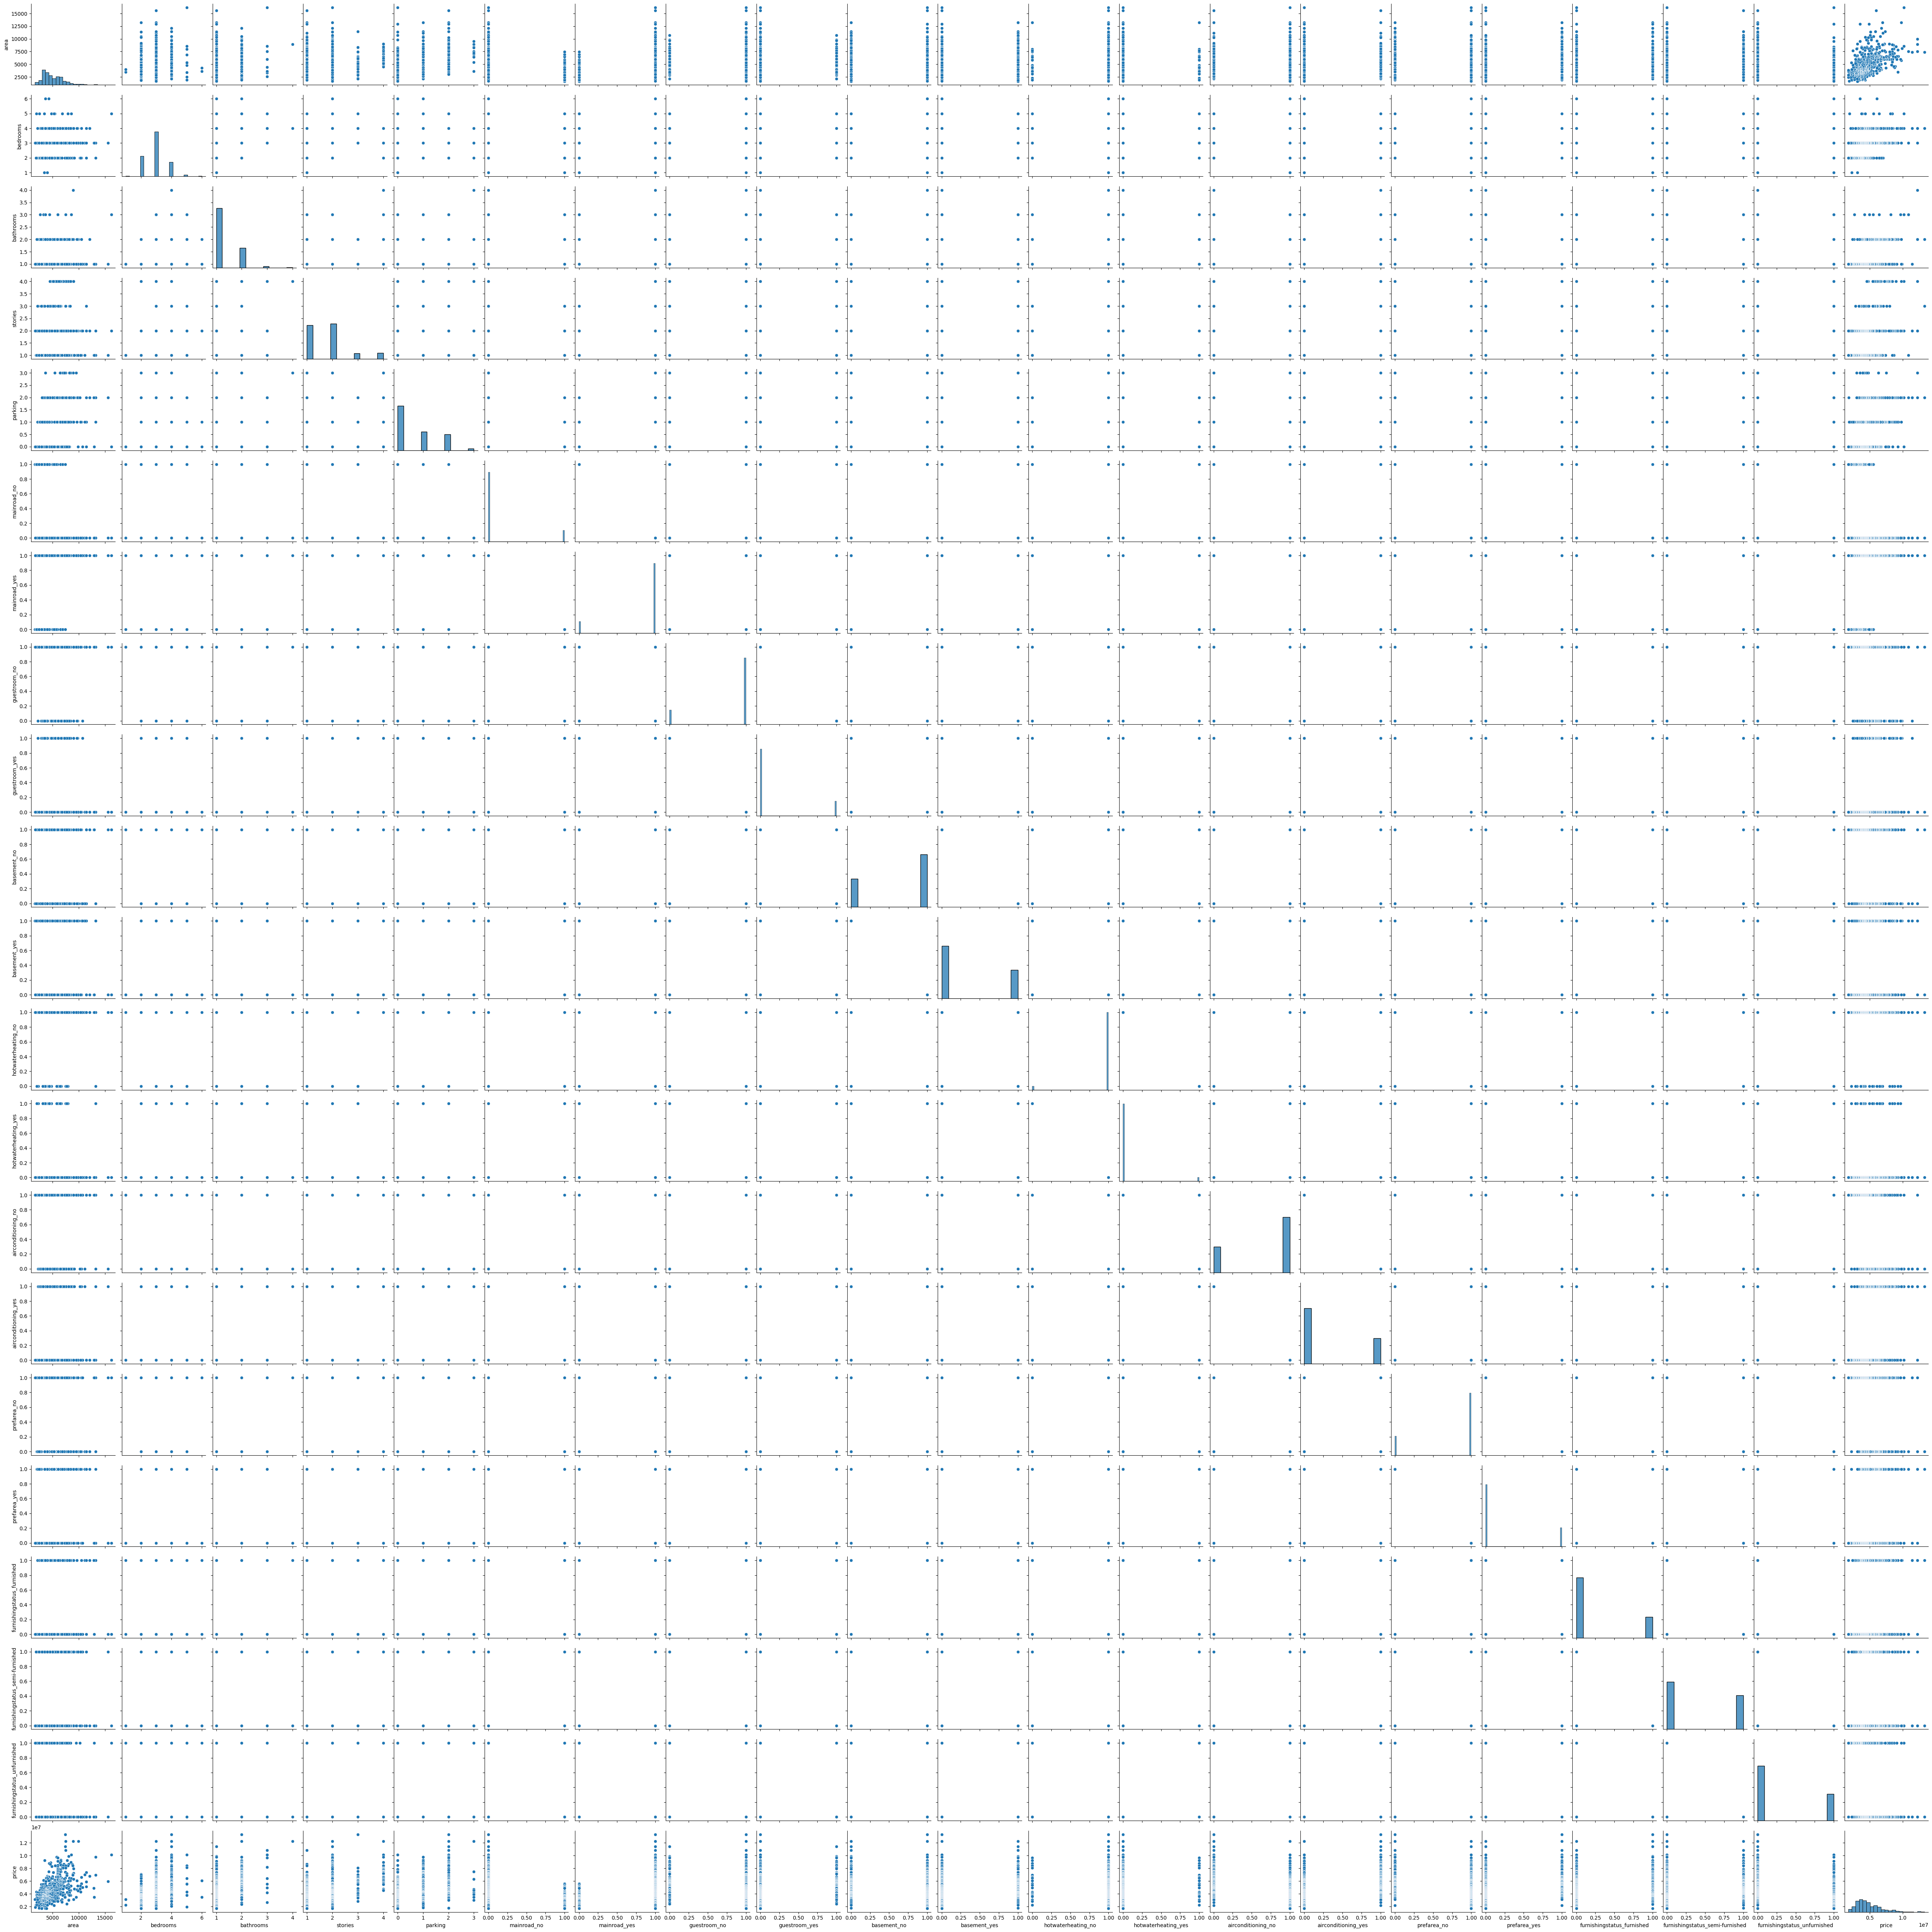

In [82]:
sns.pairplot(df)

In [68]:
X = df.iloc[:,:-1]
np.array(X)
y=df['price']
np.array(y)

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [69]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
#standardization and normalization

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(X_train)

array([[-0.24934679, -1.25962345,  1.5277588 , ..., -0.58489765,
         1.13107454, -0.66460222],
       [ 0.22262697, -1.25962345, -0.55694217, ..., -0.58489765,
         1.13107454, -0.66460222],
       [-0.73947339,  0.0514132 , -0.55694217, ..., -0.58489765,
         1.13107454, -0.66460222],
       ...,
       [-0.29472888,  0.0514132 ,  1.5277588 , ...,  1.70970083,
        -0.88411503, -0.66460222],
       [-0.50348651, -1.25962345, -0.55694217, ..., -0.58489765,
        -0.88411503,  1.50465943],
       [ 0.15909204,  0.0514132 ,  1.5277588 , ..., -0.58489765,
         1.13107454, -0.66460222]], shape=(408, 20))

In [71]:
scalar.transform(X_test)

array([[ 0.34062041,  1.36244986,  1.5277588 , ..., -0.58489765,
        -0.88411503,  1.50465943],
       [ 0.61291297,  0.0514132 ,  1.5277588 , ...,  1.70970083,
        -0.88411503, -0.66460222],
       [-0.50348651, -1.25962345, -0.55694217, ..., -0.58489765,
         1.13107454, -0.66460222],
       ...,
       [-0.68047667,  0.0514132 , -0.55694217, ..., -0.58489765,
        -0.88411503,  1.50465943],
       [-0.68728398, -1.25962345, -0.55694217, ..., -0.58489765,
        -0.88411503,  1.50465943],
       [-0.52163935,  0.0514132 , -0.55694217, ..., -0.58489765,
         1.13107454, -0.66460222]], shape=(137, 20))

In [72]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [79]:
y_pred = regression.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

MAE = mean_absolute_error(y_test,y_pred)
MSE =mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MAE: {MAE}\nMSE: {MSE}\nR2_Score: {r2}')


MAE: 915955.8864463972
MSE: 1552389233075.0435
R2_Score: 0.6631280462200988
